<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/glaucoma_detection_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
content/drive/My Drive/Deep Learning Project

In [0]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image

%matplotlib inline

In [0]:
dataset = []
label = []

In [0]:
import os
# Directory with our infected pictures
Glaucoma_dir = os.path.join('drive/My Drive/Deep Learning Project/Glaucoma')

# Directory with our uninfected pictures
Non_Glaucoma_dir = os.path.join('drive/My Drive/Deep Learning Project/Non Glaucoma')

In [8]:
os.listdir(Non_Glaucoma_dir)

['1 (12).tif',
 '1 (24).tif',
 '1 (28).tif',
 '1 (32).tif',
 '1 (1).tif',
 '1 (7).tif',
 '1 (29).tif',
 '1 (18).tif',
 '1 (25).tif',
 '1 (33).tif',
 '1 (13).tif',
 '1 (22).tif',
 '1 (34).tif',
 '1 (38).tif',
 '1 (14).tif',
 '1 (23).tif',
 '1 (36).tif',
 '1 (6).tif',
 '1 (39).tif',
 '1 (15).tif',
 '1 (35).tif',
 '1 (19).tif',
 '1 (20).tif',
 '1 (5).tif',
 '1 (9).tif',
 '1 (10).tif',
 '1 (17).tif',
 '1 (16).tif',
 '1 (40).tif',
 '1 (30).tif',
 '1 (21).tif',
 '1 (37).tif',
 '1 (8).tif',
 '1 (4).tif',
 '1 (3).tif',
 '._1 (1).tif',
 '1 (26).tif',
 '1 (27).tif',
 '1 (11).tif',
 '1 (31).tif',
 '1 (2).tif']

In [0]:
parasitized_images = os.listdir(Glaucoma_dir)
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'tif'):
            image = cv2.imread(Glaucoma_dir+"/"+image_name)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [0]:
uninfected_images = os.listdir(Non_Glaucoma_dir)
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'tif'):
            image = cv2.imread(Non_Glaucoma_dir + '/' + image_name)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [29]:
len(dataset)

40

In [33]:
dataset[0].shape

(64, 64)

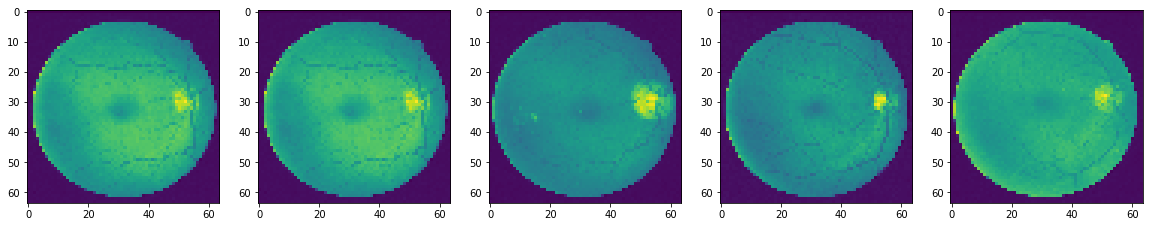

In [38]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(parasitized_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

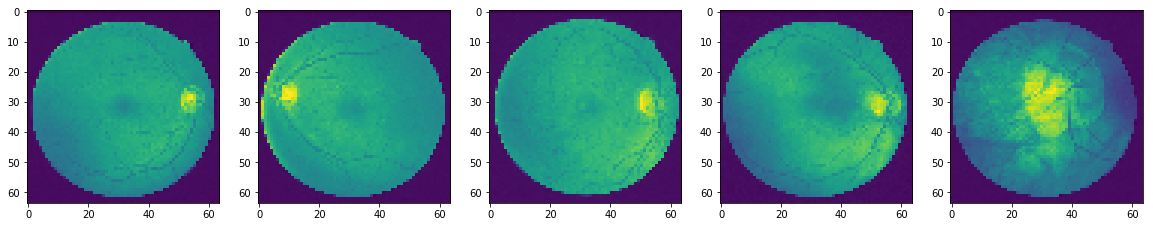

In [37]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(uninfected_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

In [0]:
X = np.array(dataset)

In [40]:
X.shape

(40, 64, 64)

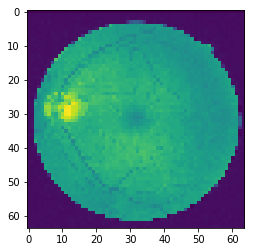

In [41]:
plt.imshow(X[0])

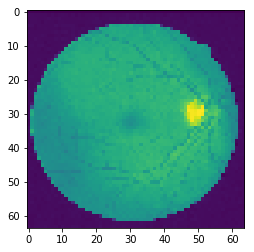

In [42]:
plt.imshow(X[39])

In [0]:
x_list = []
for items in dataset:
  x_list.append(np.array(items).flatten())

In [0]:
x =np.array(x_list)

In [50]:
x.shape

(40, 4096)

In [0]:
y = np.array(label).reshape(-1,1)

In [94]:
y.shape

(40, 1)

In [0]:
from sklearn.model_selection import train_test_split
# Split data into train/test = 80%/20%
x_vals_train,x_vals_test,y_vals_train,y_vals_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [0]:
import tensorflow as tf

In [0]:
# Declare batch size
batch_size = 100

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 4096], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for both Neural Network Layers
hidden_layer_nodes = 10
A1 = tf.Variable(tf.random_normal(shape=[4096,hidden_layer_nodes])) # inputs -> hidden nodes
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # one biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1])) # hidden inputs -> 1 output
b2 = tf.Variable(tf.random_normal(shape=[1]))   # 1 bias for the output


# Declare model operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.sigmoid(tf.add(tf.matmul(hidden_output, A2), b2))

In [0]:
# Declare loss function
loss = tf.reduce_mean(tf.square(y_target - final_output))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

# Accuracy calculation
correct_prediction = tf.equal(tf.argmax(final_output, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
r =np.random.choice(len(x_vals_train), size=batch_size)

In [101]:
y_vals_train[r]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [102]:
# Run the training
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
# Training loop
loss_vec = []
test_loss = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    #rand_y = np.transpose([y_vals_train[rand_index]])
    rand_y = y_vals_train[rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    #test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%100==0:
        #print('Generation: ' + str(i+1) + '. Loss_training = ' + str(temp_loss))
        train_accuracy = accuracy.eval(feed_dict={x_data: rand_x, y_target: rand_y})
        print("Step %d, training batch accuracy %g %%"%(i+1, train_accuracy*100))
       # print('Generation: ' + str(i+1) + '. Loss_test = ' + str(test_temp_loss))
        #test_accuracy = accuracy.eval(feed_dict={x_data: x_vals_test, y_target:np.transpose([y_vals_test])})
        test_accuracy = accuracy.eval(feed_dict={x_data: x_vals_test, y_target:y_vals_test})
        print("Step %d, test batch accuracy %g %%"%(i+1, test_accuracy*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step 100, training batch accuracy 100 %
Step 100, test batch accuracy 100 %
Step 200, training batch accuracy 100 %
Step 200, test batch accuracy 100 %
Step 300, training batch accuracy 100 %
Step 300, test batch accuracy 100 %
Step 400, training batch accuracy 100 %
Step 400, test batch accuracy 100 %
Step 500, training batch accuracy 100 %
Step 500, test batch accuracy 100 %
Step 600, training batch accuracy 100 %
Step 600, test batch accuracy 100 %
Step 700, training batch accuracy 100 %
Step 700, test batch accuracy 100 %
Step 800, training batch accuracy 100 %
Step 800, test batch accuracy 100 %
Step 900, training batch accuracy 100 %
Step 900, test batch accuracy 100 %
Step 1000, training batch accuracy 100 %
Step 1000, test batch accuracy 100 %
